<a href="https://colab.research.google.com/github/Ruben-Salumu/Ruben-Salumu/blob/main/Analyse_de_donn%C3%A9es_massive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTATION DES LIBRERIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# **DATASET**

In [2]:
df = pd.read_csv('/content/diabetes_UCI.csv')
print(df.columns.values)
print('df =', df)
print('df_Info =', df.info())

df = df.reset_index()
df.drop(['index'], axis='columns', inplace=True)

YRdf = pd.DataFrame(df['Outcome'])
YR = np.array(YRdf).ravel()
print('np.unique(YR) =', np.unique(YR))

Xdf = df.copy()
Xdf.drop(['Outcome'], axis ='columns', inplace=True)

K = int(np.max(YR))
X = np.array(Xdf)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        

In [3]:
Xdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# **VISUALISATION DES DONNEES**
Visualisation liée aux grossesses

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

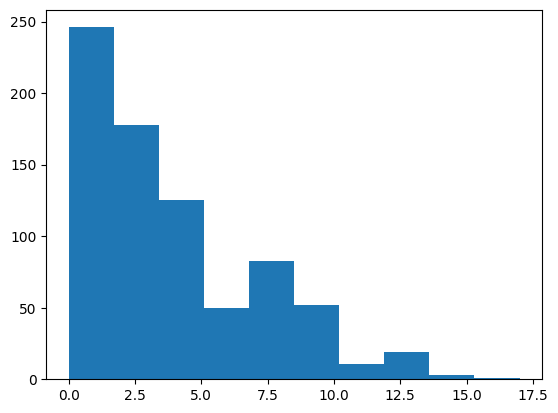

In [4]:
plt.hist(X[:,0])

([<matplotlib.axis.XTick at 0x7e820b7bdab0>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

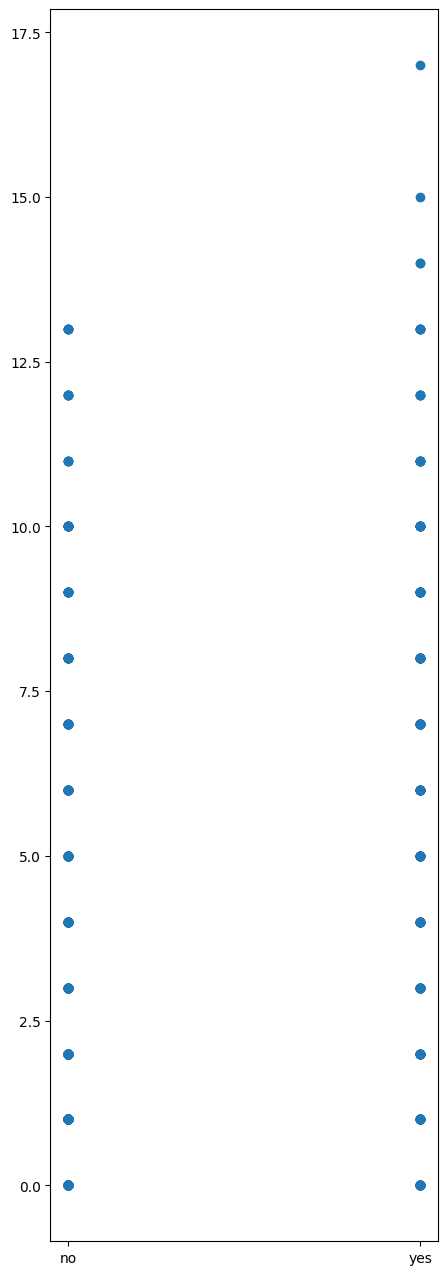

In [5]:
#Ici on va essayer de voir si le nombre des femmes atteind par le diabete et qui sont enceinte est plus élévé
plt.figure(figsize=(5,16))
plt.scatter(YR, X[:,0])
x_ticks =[0, 1]

#specifié les labels de l’axe des abscisses
x_labels =['no', 'yes']

#ajout des valeurs à l’axe des abscisses du graphique

plt.xticks(ticks=x_ticks, labels = x_labels)


# **Visualisation liée au glucose**

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

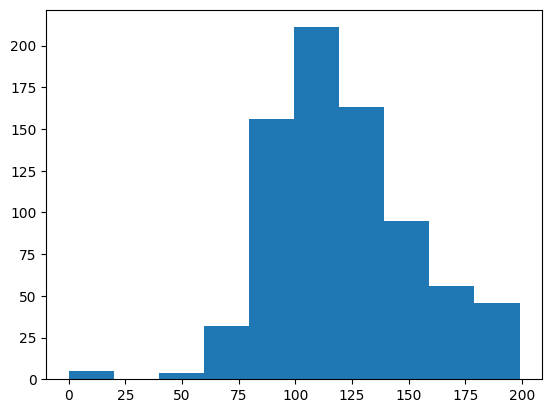

In [6]:
plt.hist(X[:,1])

**A partir d'ici on va essayer de voir ceux qui ont le diabete et ceux qui ne l'ont pas**

In [7]:
Glucose_no_d = X[np.where(YR==0), 1]
Glucose_d = X[np.where(YR==1), 1]

In [8]:
Glucose_no_d = np.reshape(Glucose_no_d, (-1, 1))
Glucose_d = np.reshape(Glucose_d, (-1, 1))

**Pas de diabete**

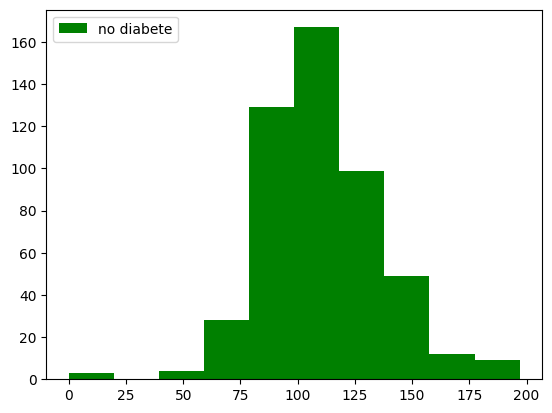

In [9]:
plt.hist(Glucose_no_d[:,0], color = 'green', label ='no diabete')
plt.legend(loc='upper left')

**Diabete**

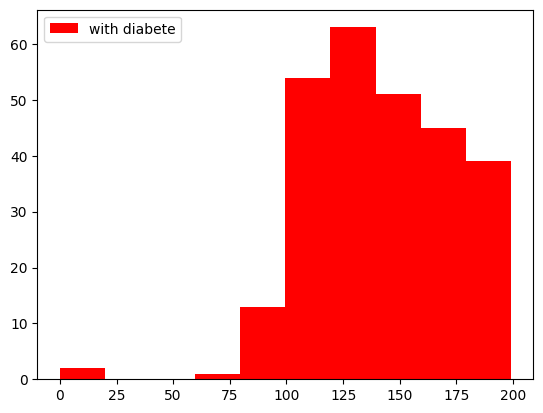

In [10]:
plt.hist(Glucose_d[:,0], color = 'red', label='with diabete')
plt.legend(loc='upper left')

 **Ici on superpose ceux qui ont le diabete sur ceux qui ne l'ont pas **

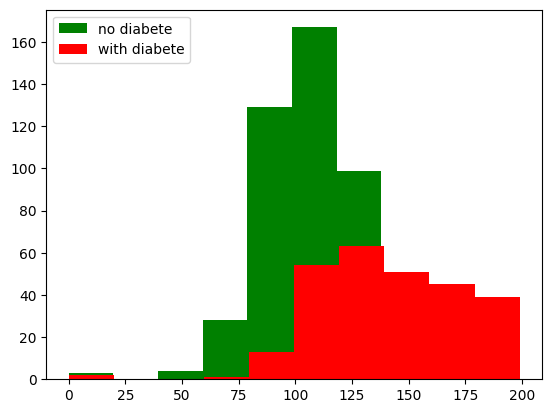

In [11]:
plt.hist(Glucose_no_d[:, 0], color='green', label='no diabete')
plt.hist(Glucose_d[:,0], color='red', label='with diabete')
plt.legend(loc='upper left')
plt.show()

# **Models**

**Logistic Regession**

cet alogorithm de Machine Learning prend les variables d'entrée et les variables de sortie et nous donne une probabilité  que le label de sorti soit 1 ou 0

In [12]:
X.shape[0]

768

In [13]:
test_size = 268/X.shape[0]
x_train, x_test, y_train, y_test = train_test_split(X, YR, test_size =test_size)

In [14]:
print("X train  shape :", x_train.shape)
print("Y train shape :", y_train.shape)

print("X test shape :", x_test.shape)
print("Y test shape :", y_test.shape)


X train  shape : (500, 8)
Y train shape : (500,)
X test shape : (268, 8)
Y test shape : (268,)


In [15]:
LR = LogisticRegression(max_iter=1000).fit(x_train, y_train)

In [16]:
LR.score(x_train, y_train)

0.788

In [17]:
LR.score(x_test, y_test)

0.7649253731343284

<Figure size 2500x2500 with 0 Axes>

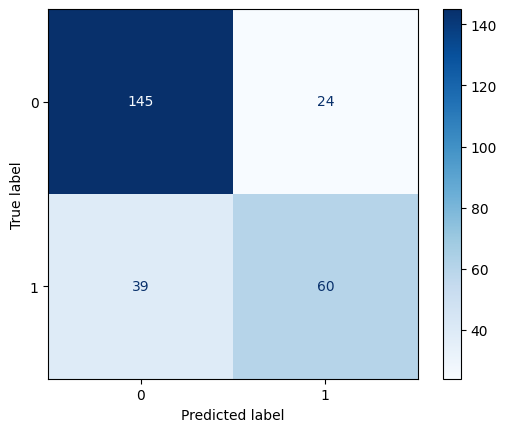

In [18]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    LR,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize = None,
)

plt.show()

# **Prediction**

In [19]:
LR.predict_proba(np.reshape(x_test[1,:],(1, -1)))

array([[0.92096393, 0.07903607]])

In [20]:
y_test[1]

0

In [21]:
LR.classes_

array([0, 1])

In [22]:
LR.predict(np.reshape(x_test[1,:], (1, -1)))

array([0])

In [23]:
LR.predict(np.reshape(x_test[4,:], (1, -1)))

array([0])

In [24]:
y_test[4]

0

# **CROSS VALIDATION**

La validation croisée

In [25]:
scores = cross_val_score(LR, X, YR, cv = 20)

In [42]:
LR = LogisticRegression(max_iter=1000)

In [26]:
cv = np.arange(5, 30, 1)
for i in cv :
  scores = cross_val_score(LR, X, YR, cv =i)
  print(f"mean with cv = {i} : {np.mean(scores)}")

mean with cv = 5 : 0.7721925133689839
mean with cv = 6 : 0.7760416666666666
mean with cv = 7 : 0.7748123436196831
mean with cv = 8 : 0.7721354166666667
mean with cv = 9 : 0.7682626538987687
mean with cv = 10 : 0.7734791524265209
mean with cv = 11 : 0.7734989648033125
mean with cv = 12 : 0.7747395833333334
mean with cv = 13 : 0.7735767057800957
mean with cv = 14 : 0.776046176046176
mean with cv = 15 : 0.7760432378079437
mean with cv = 16 : 0.76953125
mean with cv = 17 : 0.774765558397272
mean with cv = 18 : 0.7723022025347608
mean with cv = 19 : 0.7762516046213094
mean with cv = 20 : 0.77361673414305
mean with cv = 21 : 0.774917774917775
mean with cv = 22 : 0.7722307104660046
mean with cv = 23 : 0.7722235139114934
mean with cv = 24 : 0.7747395833333334
mean with cv = 25 : 0.7723870967741935
mean with cv = 26 : 0.7723695844385499
mean with cv = 27 : 0.7737182995803685
mean with cv = 28 : 0.773762282690854
mean with cv = 29 : 0.7737007564593772


In [27]:
# Fit the LR object to the training data
LR.fit(x_train, y_train)

# Now you can access the coef_ attribute
LR.coef_.ravel()

array([ 0.15501095,  0.03443494, -0.0095449 , -0.0042403 , -0.00136499,
        0.09703805,  0.70247629,  0.01262566])

In [28]:
alphas = np.arange(10e-6, 10e-3, 10e-6)
res = np.zeros((alphas.shape[0],8))
acc = np.zeros((alphas.shape[0]))
acc.shape

(999,)

# **LASSO**

In [29]:
lambda_ = 0.01
LR_Lasso = LogisticRegression(penalty = '11', solver='saga', C = lambda_, max_iter=1000)
alphas = np.arange(10e-6, 10e-3, 10e-6)
res = np.zeros((alphas.shape[0], 8))
acc = np.zeros((alphas.shape[0]))
for i,alpha in enumerate(alphas):
  LR_Lasso= LogisticRegression(penalty='l1', solver='saga', C = alpha, max_iter=1000).fit(x_train, y_train)
  acc[i] = LR_Lasso.score(x_train, y_train)
  for j,coeff in enumerate(LR_Lasso.coef_.ravel()):
    res[i,j]=coeff

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

<Figure size 2280x1080 with 0 Axes>

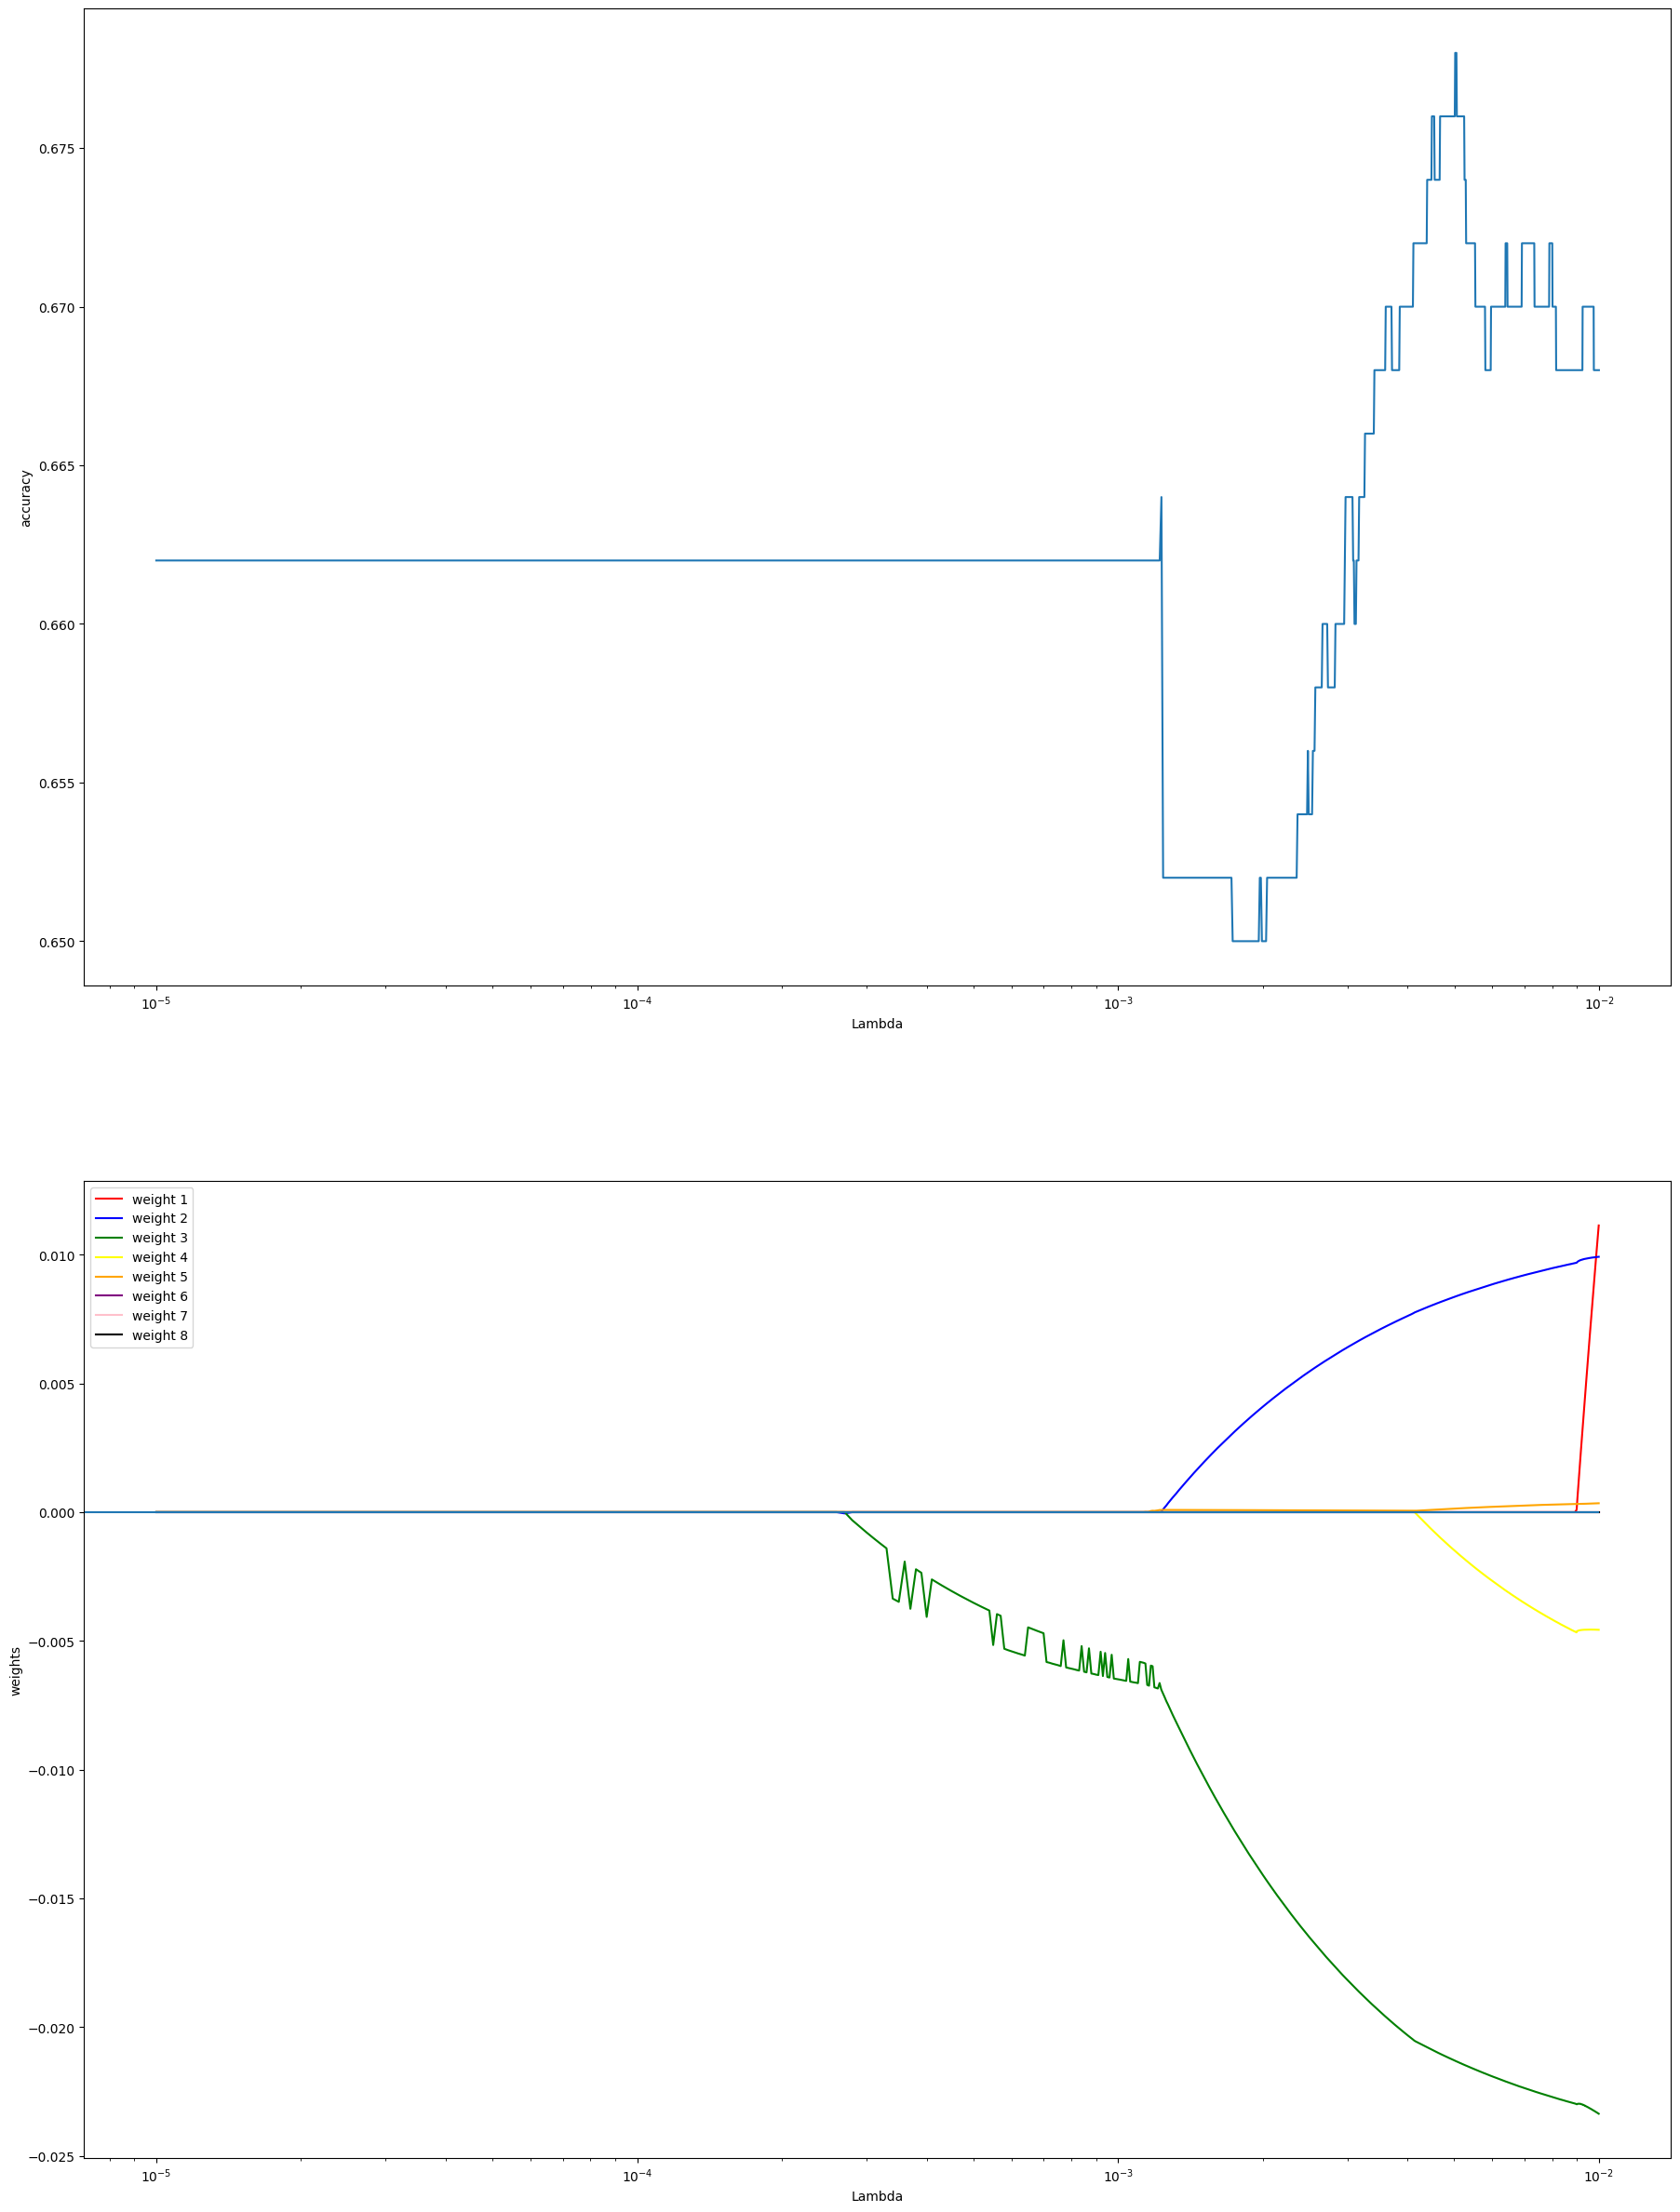

In [30]:
plt.figure(figsize=(19,9), dpi =120)
fig, (ax1, ax2)= plt.subplots(2,1, figsize=(22, 30))

ax1.plot(alphas, acc.ravel())
ax2.plot(alphas, res[:, 0], color = 'red', label = 'weight 1')
ax2.plot(alphas, res[:, 1], color = 'blue', label = 'weight 2')
ax2.plot(alphas, res[:, 2], color = 'green', label = 'weight 3')
ax2.plot(alphas, res[:, 3], color = 'yellow', label = 'weight 4')
ax2.plot(alphas, res[:, 4], color = 'orange', label = 'weight 5')
ax2.plot(alphas, res[:, 5], color = 'purple', label = 'weight 6')
ax2.plot(alphas, res[:, 6], color = 'pink', label = 'weight 7')
ax2.plot(alphas, res[:, 7], color = 'black', label = 'weight 8')
ax2.legend()

ax1.set(xlabel='Lambda', ylabel ='accuracy')
ax2.set(xlabel='Lambda', ylabel='weights')
ax2.set_xscale('log')
ax1.set_xscale('log')
ax2.hlines(y=0, xmin=0, xmax=10e-3)

# **LDA**

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

test_size = 268/X.shape[0]

x_train, x_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
LDA.score(x_train, y_train)

0.804

In [33]:
LDA.score(x_test, y_test)

0.7238805970149254

<Figure size 2500x2500 with 0 Axes>

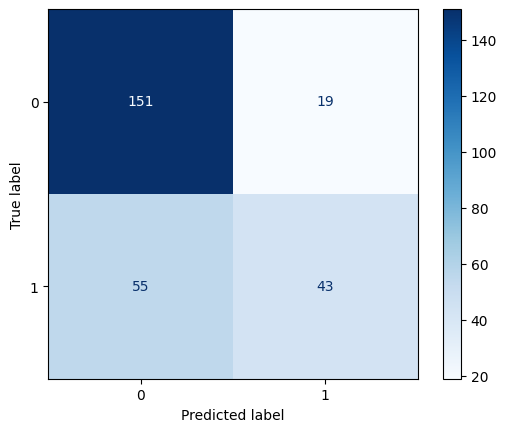

In [34]:
plt.figure(figsize=(25, 25))
disp = ConfusionMatrixDisplay.from_estimator(
    LDA,
    x_test,
    y_test,
    cmap = plt.cm.Blues,
    normalize= None,
)
plt.show()

# **QDA**

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


test_size = 268/X.shape[0]
x_train, x_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [36]:
QDA.score(x_train, y_train)

0.774

In [37]:
QDA.score(x_test, y_test)

0.753731343283582

<Figure size 2500x2500 with 0 Axes>

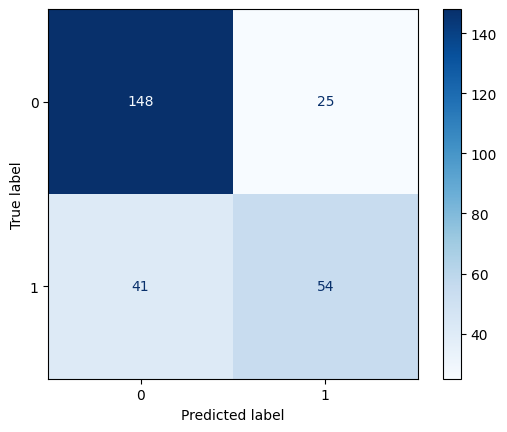

In [38]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    QDA,
    x_test,
    y_test,
    cmap = plt.cm.Blues,
    normalize = None,
)

# **SVM**

In [39]:
from sklearn import svm
SVM = svm.SVC(kernel = 'linear')
test_size = 268/X.shape [0]
x_train, x_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [40]:
SVM.score(x_train, y_train)

0.782

In [41]:
SVM.score(x_test, y_test)

0.7425373134328358

<Figure size 2500x2500 with 0 Axes>

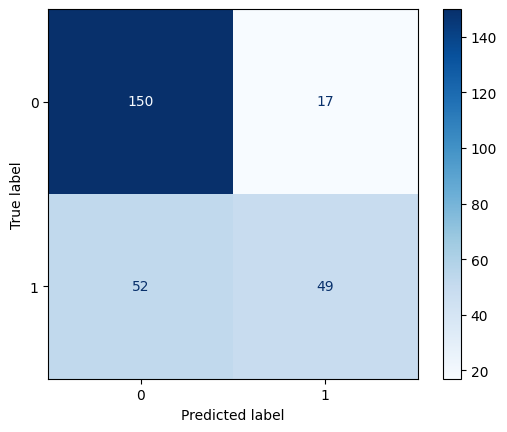

In [42]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    SVM,
    x_test,
    y_test,
    cmap = plt.cm.Blues,
    normalize = None,
)

# **Naive Bayes**

In [43]:
from sklearn.naive_bayes import GaussianNB
test_size = 268/X.shape [0]
x_train, x_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
GBN = GaussianNB()
GBN.fit(x_train, y_train)

GaussianNB()

In [44]:
GBN.score(x_train, y_train)

0.752

In [45]:
GBN.score(x_test, y_test)

0.7798507462686567

<Figure size 2500x2500 with 0 Axes>

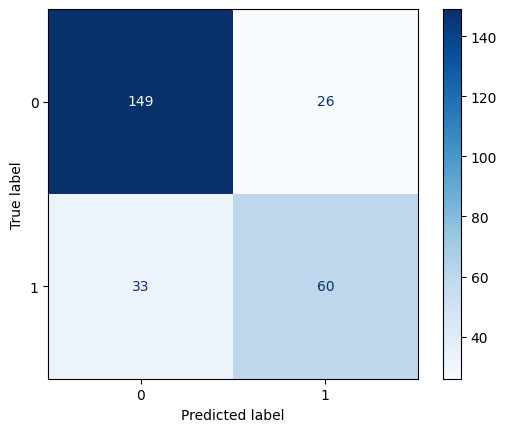

In [46]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    GBN,
    x_test,
    y_test,
    cmap = plt.cm.Blues,
    normalize = None,
)

# **Decision Tree**

In [47]:
from sklearn import tree

test_size = 268/X.shape [0]
x_train, x_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
DecisionTree.score(x_train, y_train)

1.0

In [51]:
DecisionTree.score(x_test, y_test)

0.6940298507462687

<Figure size 2500x2500 with 0 Axes>

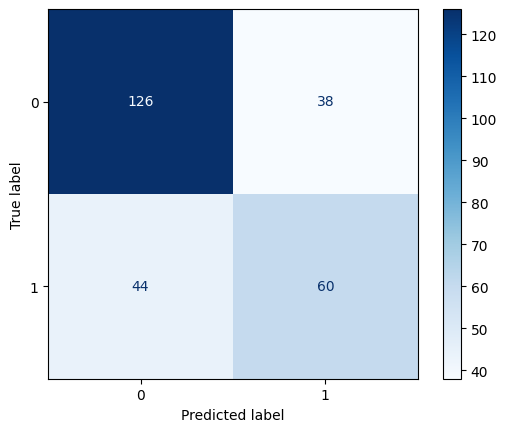

In [52]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    DecisionTree,
    x_test,
    y_test,
    cmap = plt.cm.Blues,
    normalize = None,
)

In [53]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(DecisionTree, feature_names=Xdf.columns, filled=True)

# Change samples per leaf

In [55]:
#At least 10 obs per leaf
clf2 = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf2.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [56]:
clf2.score(x_train, y_train)

0.828

In [57]:
clf2.score(x_test, y_test)

0.7052238805970149

In [58]:
#At least 10 obs per leaf

clf2 = tree.DecisionTreeClassifier(min_samples_leaf=40)
clf2.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=40)

In [59]:
clf2.score(x_train, y_train)

0.778

In [60]:
clf2.score(x_test, y_test)

0.7574626865671642

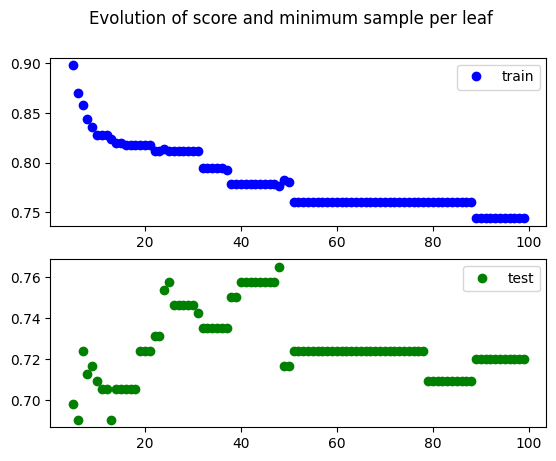

In [63]:
min_ = 5
max_ = 100
range_ = max_ - min_
scores_train = np.zeros((range_))
scores_test = np.zeros((range_))
t = np.arange(min_, max_, step = 1)


for i, val in enumerate(t):
  clf = tree.DecisionTreeClassifier(min_samples_leaf=val)
  clf.fit(x_train, y_train)
  #print("score train :", clf.score(x_train, y_train))
  #print("score test :", clf.score(x_test, y_test))
  scores_train[i] = clf.score(x_train, y_train)
  scores_test[i] = clf.score(x_test, y_test)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches =(18, 7)
fig.suptitle('Evolution of score and minimum sample per leaf')
ax1.plot(t, scores_train, 'bo', label ='train')
ax2.plot(t, scores_test, 'go', label ='test')
ax1.legend()
ax2.legend()
plt.show()

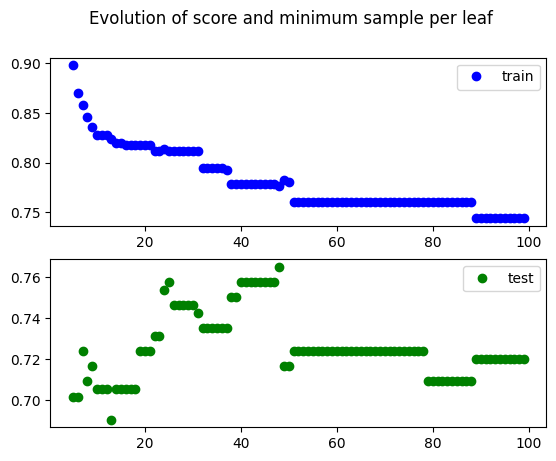

In [64]:
min_ = 5
max_ = 100
range_ = max_ - min_
scores_train = np.zeros((range_))
scores_test = np.zeros((range_))
t = np.arange(min_, max_, step = 1)


for i, val in enumerate(t):
  clf = tree.DecisionTreeClassifier(min_samples_leaf=val)
  clf.fit(x_train, y_train)
  #print("score train :", clf.score(x_train, y_train))
  #print("score test :", clf.score(x_test, y_test))
  scores_train[i] = clf.score(x_train, y_train)
  scores_test[i] = clf.score(x_test, y_test)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches =(18, 14)
fig.suptitle('Evolution of score and minimum sample per leaf')
ax1.plot(t, scores_train, 'bo', label ='train')
ax2.plot(t, scores_test, 'go', label ='test')
ax1.legend()
ax2.legend()
plt.show()

# Cost Complexity pruning

In [65]:
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs =[]
for ccp_alpha in ccp_alphas :
  clf = tree.DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  clf.fit(x_train, y_train)
  clfs.append(clf)

print(
    "Number of nodes in the last tree is : {} with ccp_alpha :{}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is : 1 with ccp_alpha :0.08247314732360944


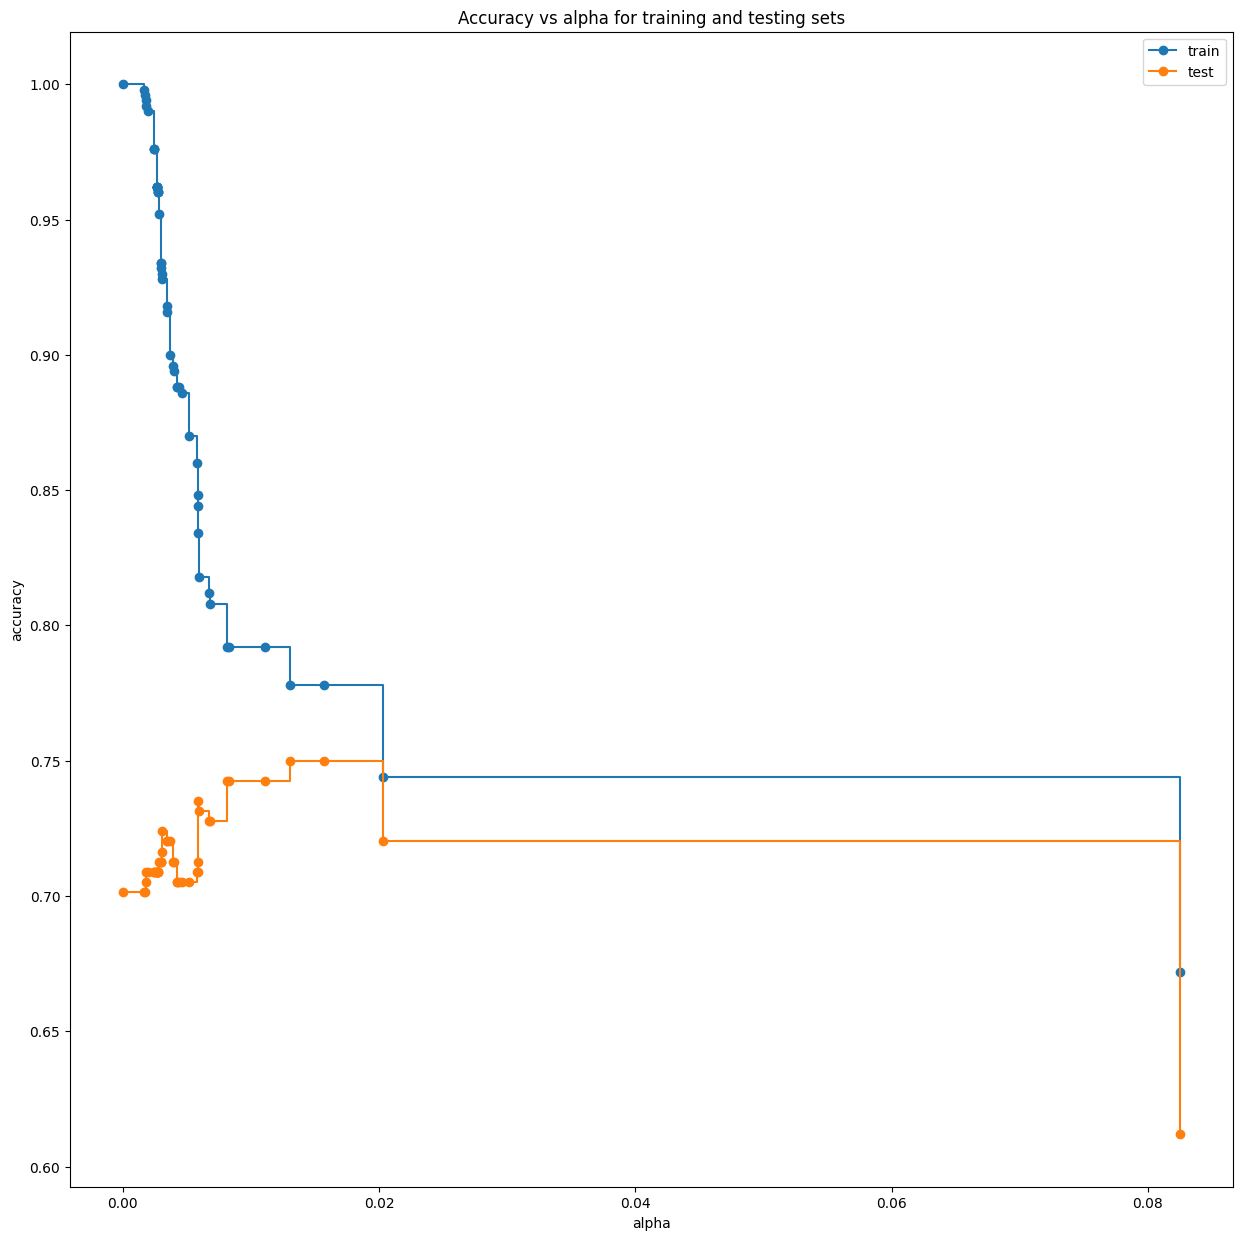

In [66]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize =(15, 15))

ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker ="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker ="o", label="test", drawstyle="steps-post")
#plt.xscale('log')
ax.legend()
plt.show()

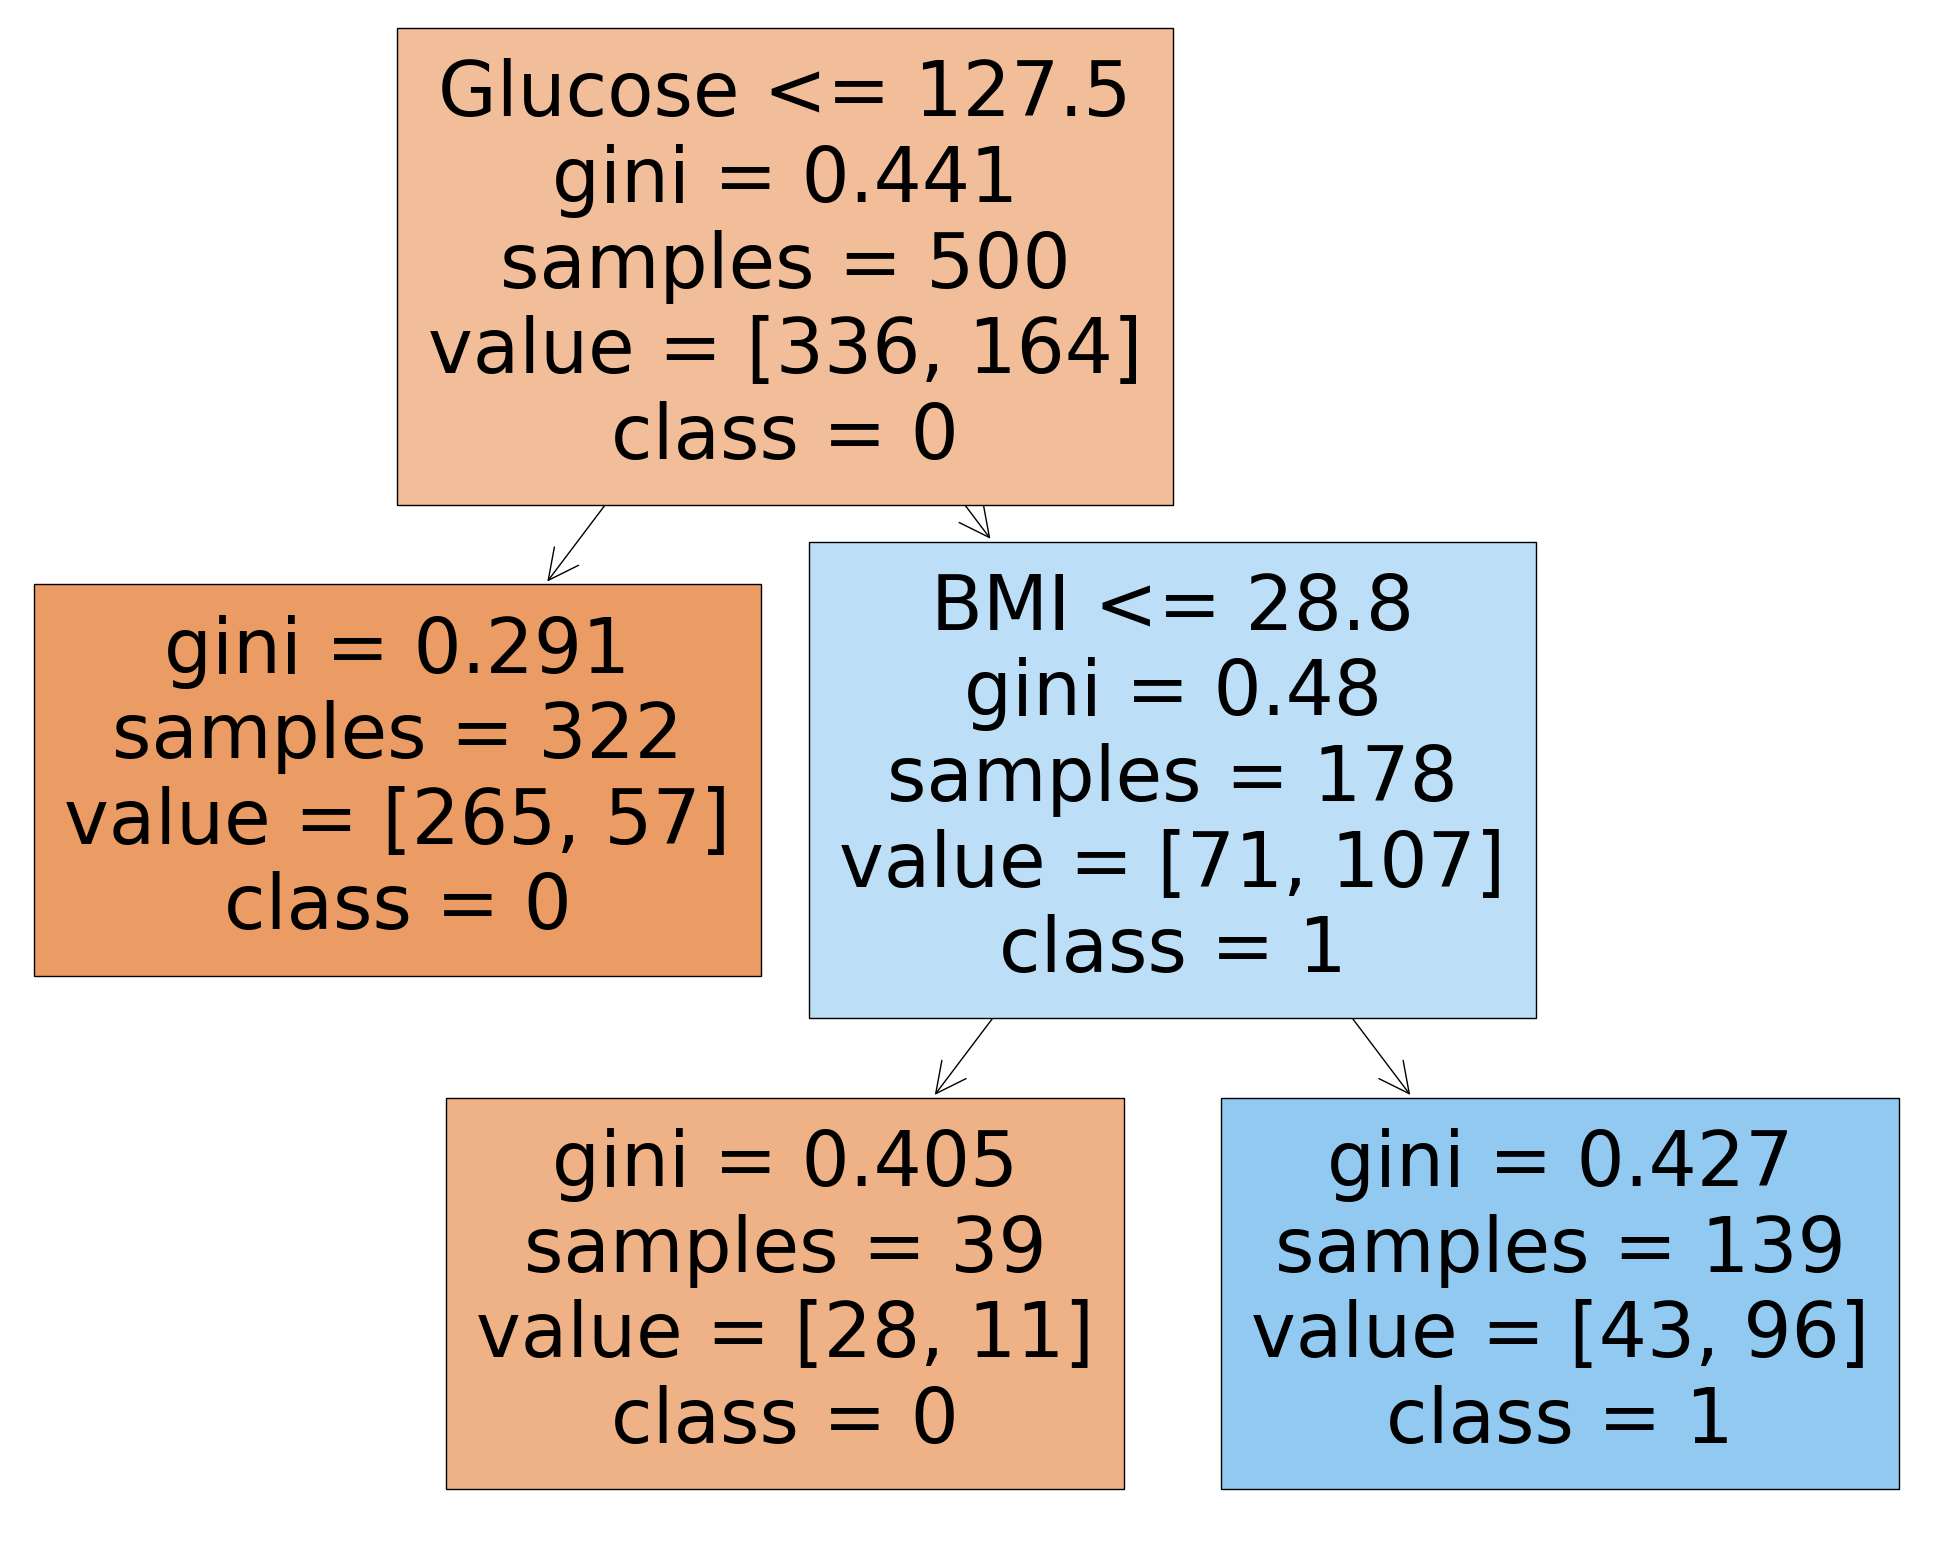

In [69]:
fig = plt.figure(figsize =(25,20))
clf = tree.DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(x_train, y_train)
_= tree.plot_tree(clf, feature_names=Xdf.columns, class_names =["0", "1"], filled=True)

In [70]:
clf.score(x_train, y_train)

0.778

In [71]:
clf.score(x_test, y_test)

0.75

In [72]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.021, max_leaf_nodes =15 )
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.021, max_leaf_nodes=15)

In [73]:
clf.score(x_train, y_train)

0.744

In [74]:
clf.score(x_test, y_test)

0.7201492537313433

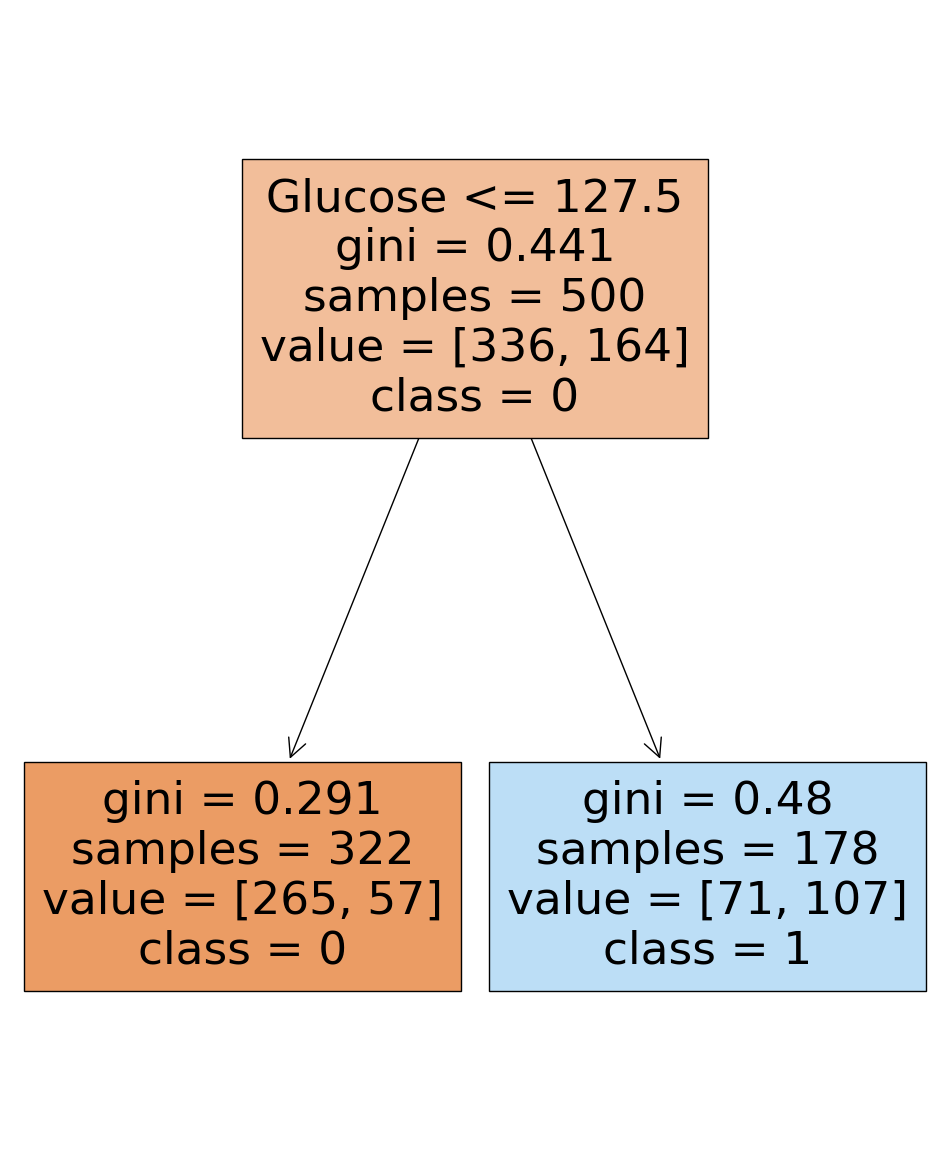

In [75]:
fig = plt.figure(figsize=(12,15))
_= tree.plot_tree(clf, feature_names=Xdf.columns, class_names=["0", "1"], filled=True)


# Comparison

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from  sklearn.metrics import confusion_matrix


In [81]:
dfs =[]
models = [
    ('LogReg', LogisticRegression(max_iter=1000)),
    ('RF', RandomForestClassifier()),
    ('SVM', svm.SVC()),
    ('GNB', GaussianNB()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('LDA', LinearDiscriminantAnalysis()),
]

results = []
names = []
scoring = ['accuracy']
n_splits = 10
target_names = ['no diaberes', 'diabetes']
for name, model in models:
  kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=90210)
  cv_results = model_selection.cross_validate(model, X, YR, cv = kfold, scoring=scoring)

  results.append(cv_results)
  names.append(name)
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)

In [83]:
final

,fit_time,score_time,test_accuracy,model
0,0.058626,0.001629,0.740260,LogReg
1,0.038804,0.001492,0.727273,LogReg
2,0.061861,0.001519,0.818182,LogReg
3,0.047396,0.001408,0.792208,LogReg
4,0.059217,0.001469,0.779221,LogReg
5,0.061887,0.001369,0.818182,LogReg
6,0.052282,0.001441,0.805195,LogReg
7,0.039815,0.001450,0.753247,LogReg
8,0.048377,0.001520,0.684211,LogReg
9,0.046110,0.001408,0.855263,LogReg


<Axes: title={'center': 'test_accuracy'}, xlabel='model'>

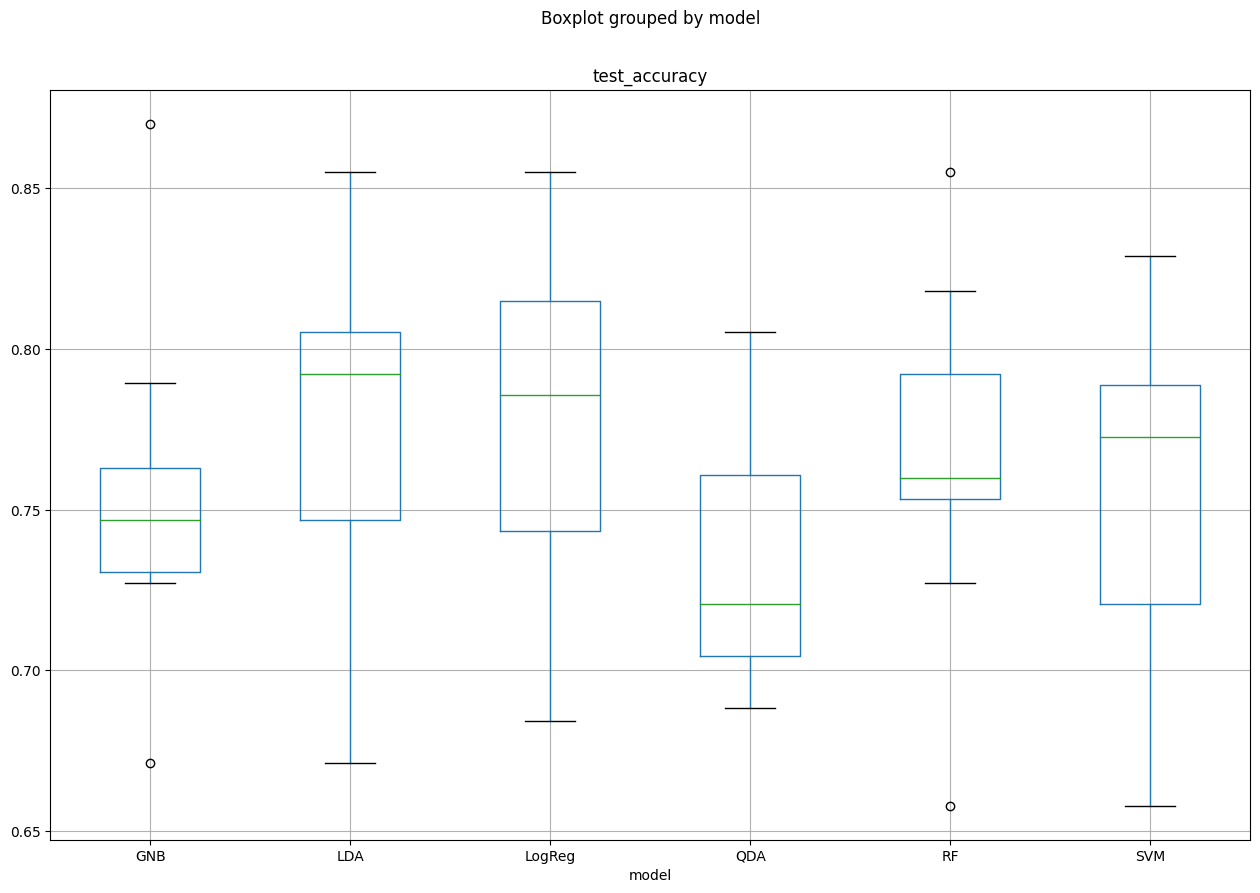

In [82]:
final.boxplot(column = 'test_accuracy', by='model', figsize=(15,10))

# KMeans

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 2 the average silhouette_score is :  0.5687897205830247
for n_clusters = 3 the average silhouette_score is :  0.5104287492214447


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 4 the average silhouette_score is :  0.42774937689821346
for n_clusters = 5 the average silhouette_score is :  0.3936539747954566


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 6 the average silhouette_score is :  0.32833398692010823


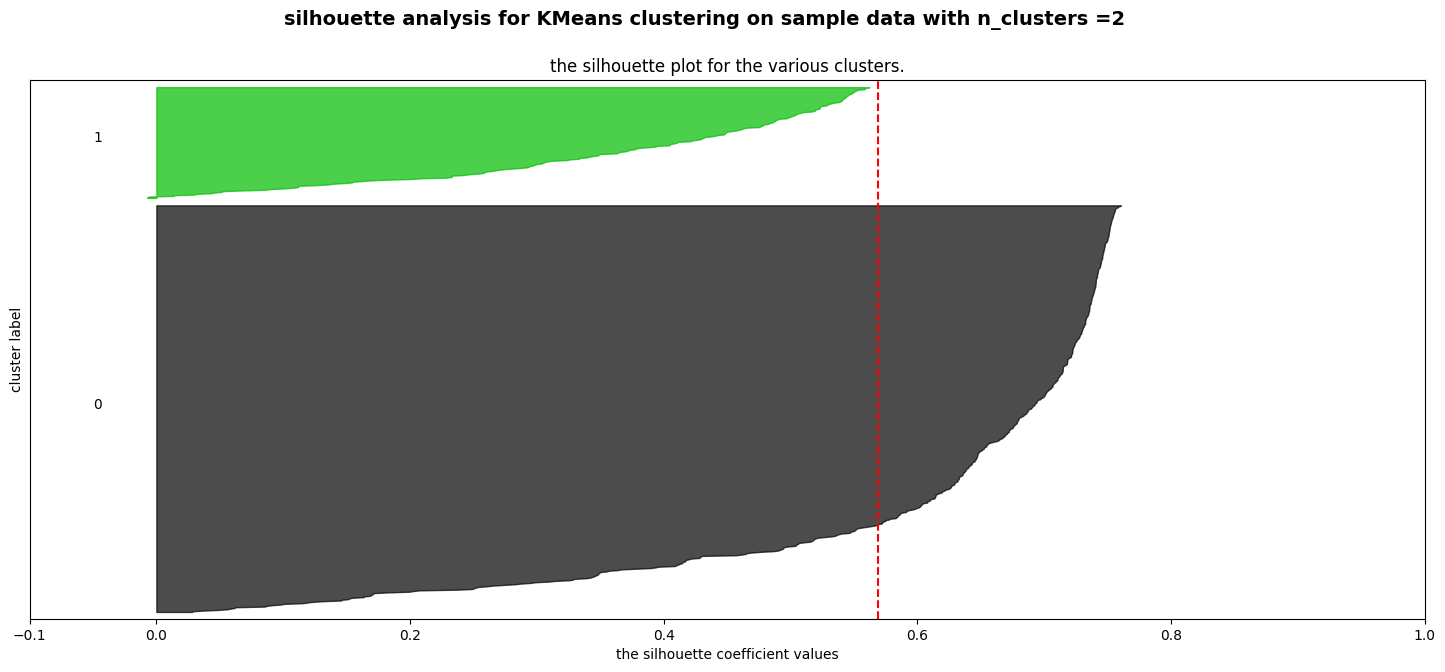

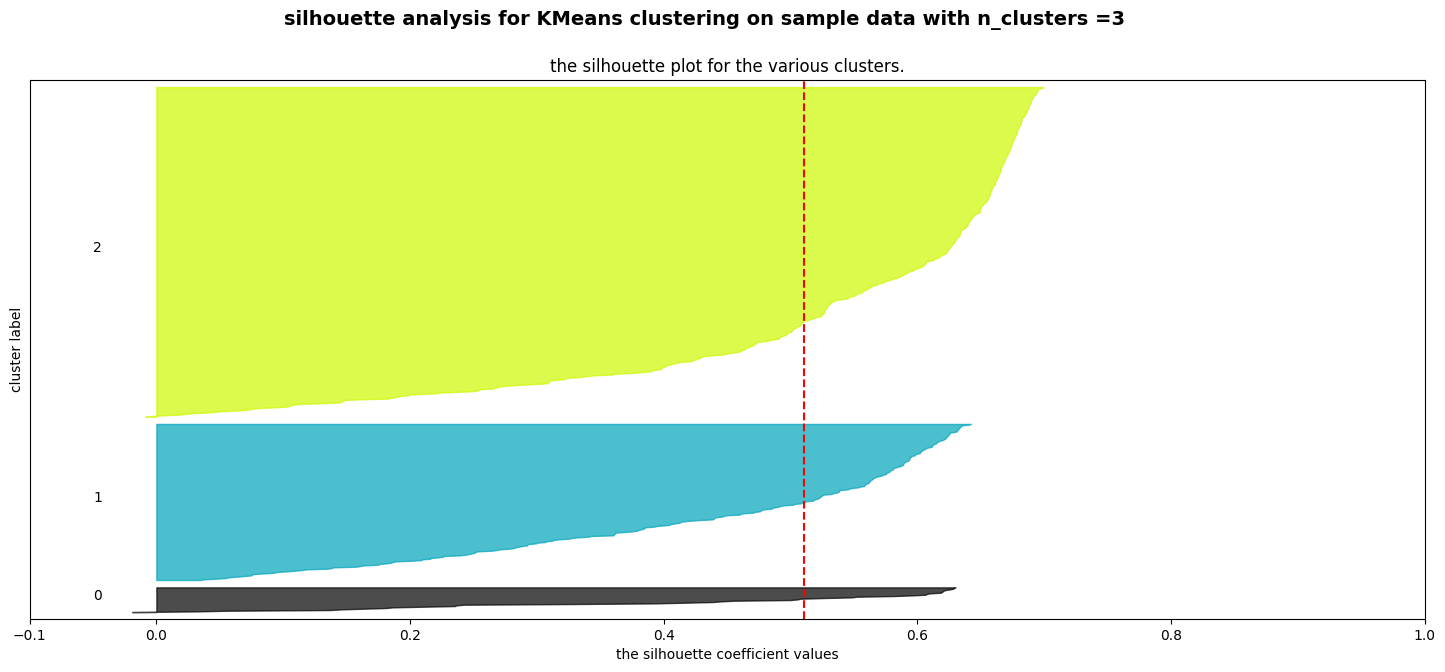

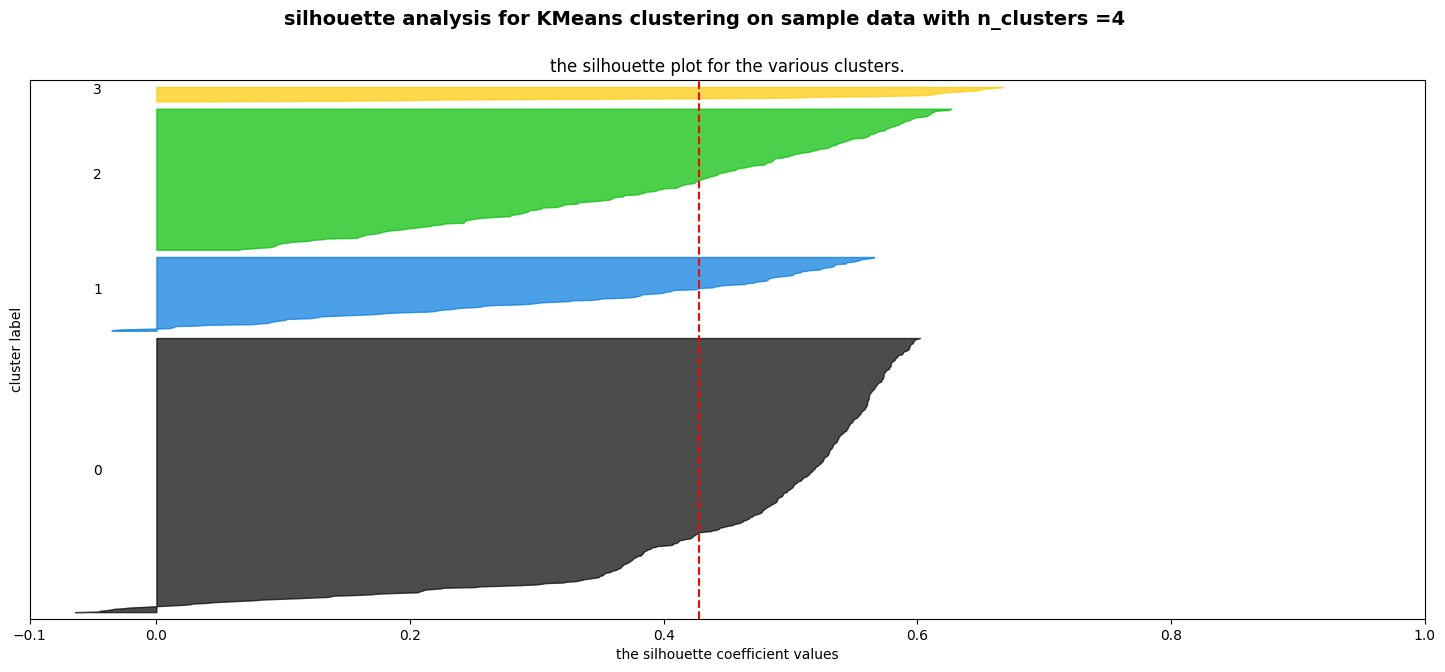

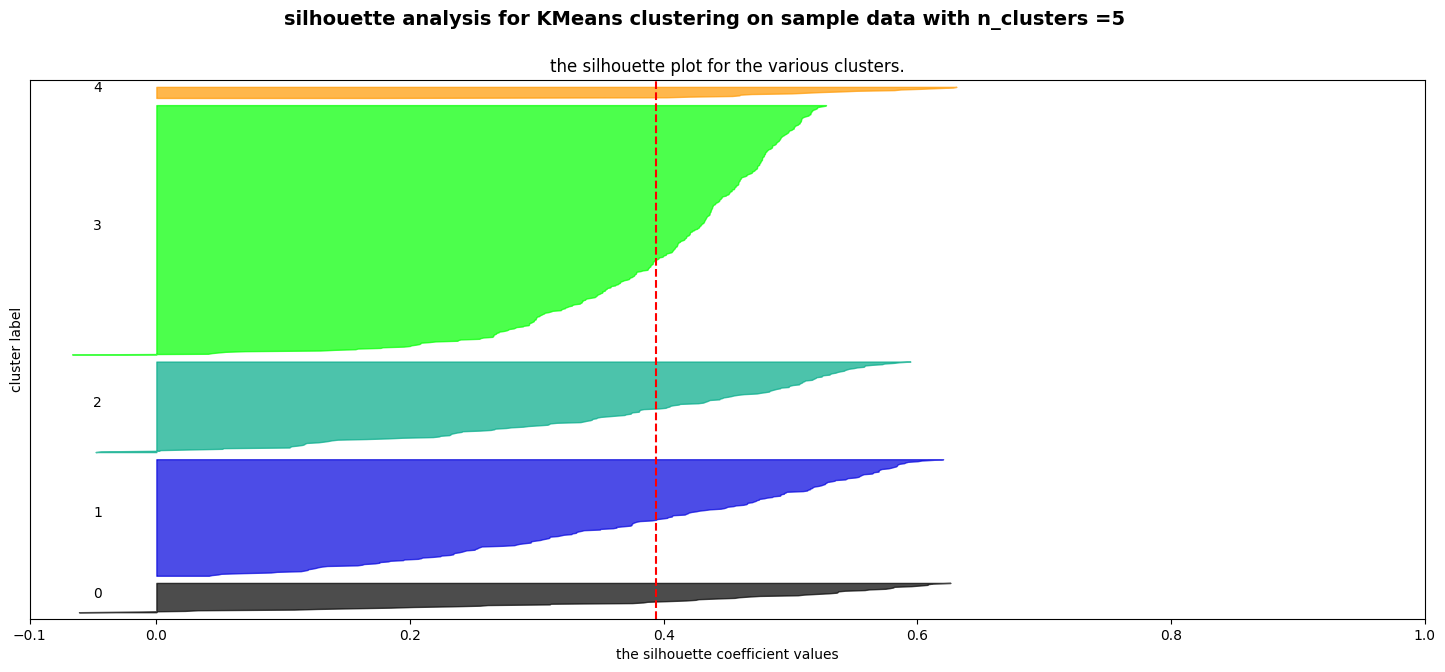

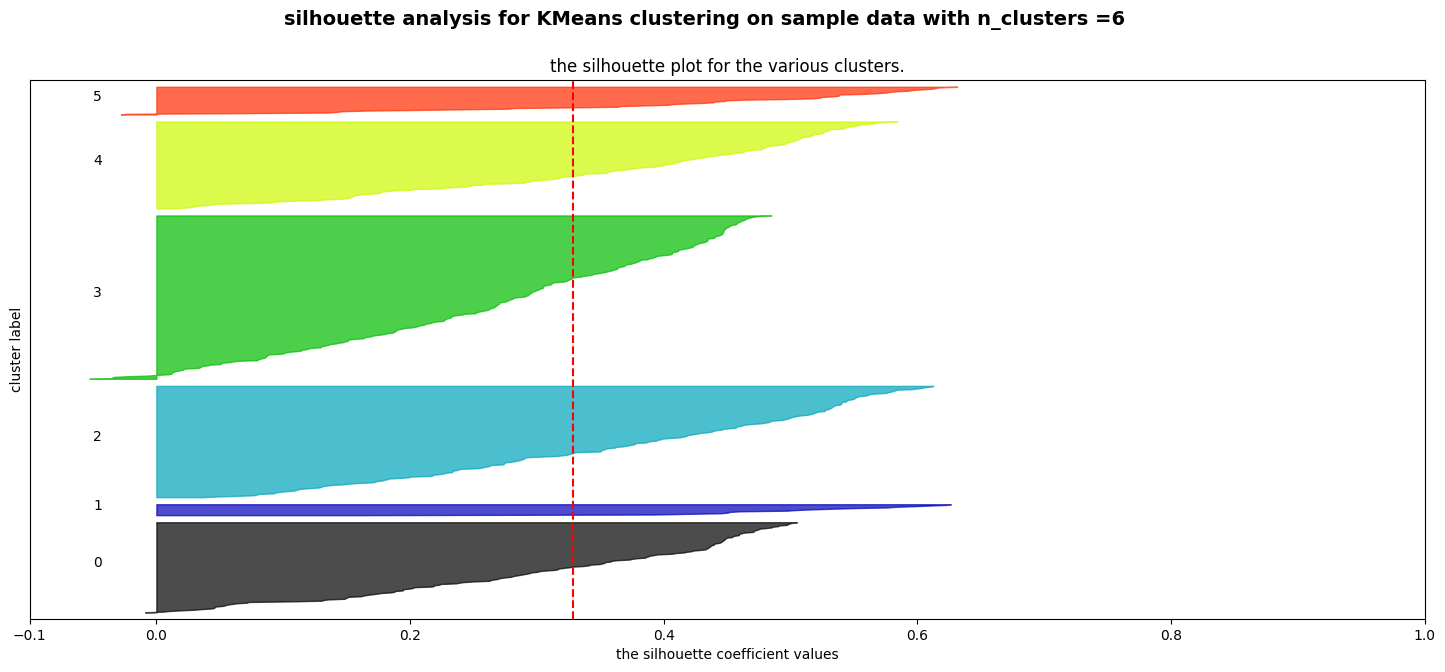

In [87]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters :
  fig, (ax1) = plt.subplots(1, 1)
  fig.set_size_inches(18, 7)


  #the 1st subplot is the silhouette plot
  #the silhouette coefficient can range from -1, 1 but in this example all
  #lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  #the (n_clusters+1)*10  is for inserting blank space between silhouette
  #plots of individual clusters, to demarcate them clearly
  ax1.set_ylim([0, len(X) + (n_clusters + 1)* 10])

  #Initialize the cluster with n_clusters value and a random generator
  #seed of 10 for reproducibility
  clusterer = KMeans(n_clusters, random_state =10)
  cluster_labels = clusterer.fit_predict(X)

  #the silhouette_score gives the average value for all the samples.
  #this gives a perspective into the density and separation of the formed
  #clusters
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(
      "for n_clusters =",
      n_clusters,
      "the average silhouette_score is : ",
      silhouette_avg,
  )

  #compute the silhouette scores for each sample
  sample_silhouatte_values = silhouette_samples (X, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    #Aggregate the silhouette score for samples belonging to
    #cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouatte_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i)/ n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    #label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    #compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples

  ax1.set_title("the silhouette plot for the various clusters.")
  ax1.set_xlabel("the silhouette coefficient values")
  ax1.set_ylabel("cluster label")


  #the vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle ="--")

  ax1.set_yticks([]) #clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  plt.suptitle(
      "silhouette analysis for KMeans clustering on sample data with n_clusters =%d"
      % n_clusters,
      fontsize = 14,
      fontweight="bold"
  )



In [88]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [89]:
silhouette_avg= silhouette_score(X, clusters)
sample_silhouette_values =silhouette_samples(X, clusters)

In [90]:
print("clusters : 2, silhouette avg", silhouette_avg)

clusters : 2, silhouette avg 0.5687897205830247


In [91]:
k_labels = kmeans.labels_
k_labels_matched = np.empty_like(k_labels)

In [92]:
print(k_labels)

[1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 

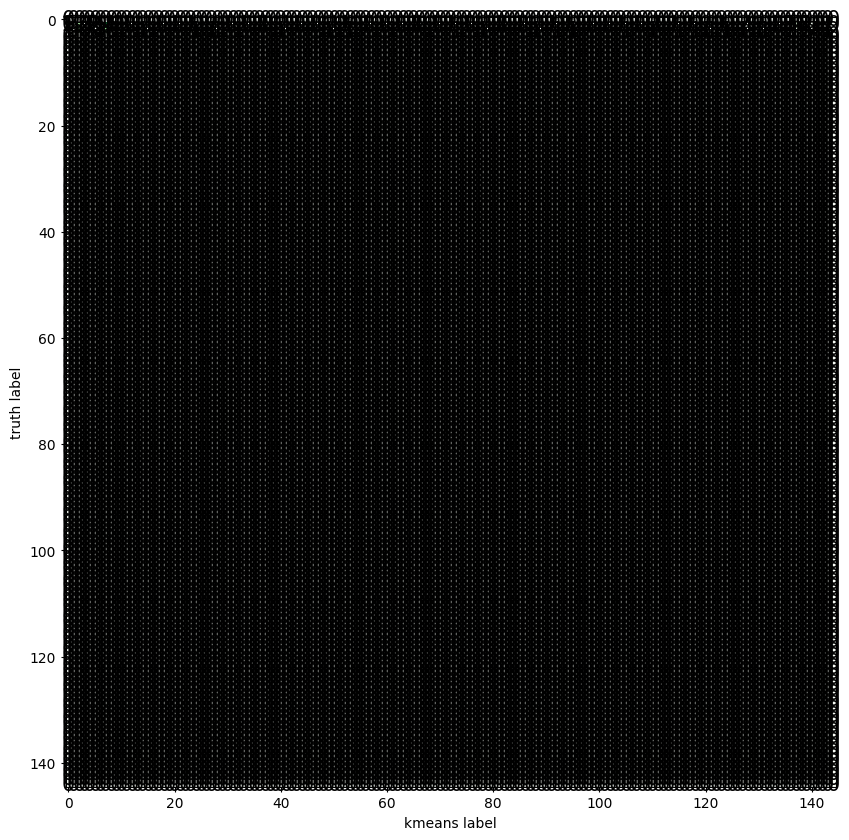

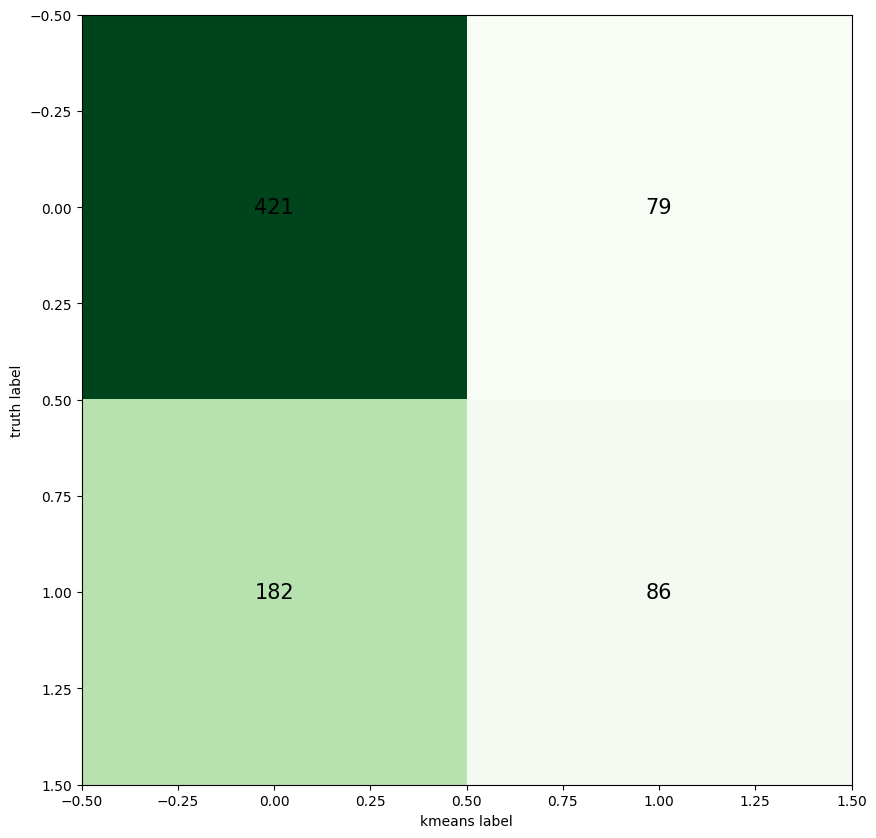

In [93]:
from sklearn.metrics import confusion_matrix
for k in np.unique(k_labels):
  match_nums = [np.sum((k_labels==k)*(YR==t)) for t in np.unique(YR)]
  k_labels_matched[k_labels==k] = np.unique(YR)[np.argmax(match_nums)]
  cm = confusion_matrix(YR, k_labels_matched)

  #plot confusion matrix

  plt.figure(figsize=(10,10))
  plt.imshow(cm, interpolation ='none', cmap = 'Greens')
  for (i,j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=15)
  plt.xlabel("kmeans label")
  plt.ylabel("truth label")
  plt.show